<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-VS-PyTorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = np.random.uniform(-10, 10, n)
    noise = np.random.normal(0, 0.15, n)
    y = (m * x + b ) + noise
    return x.astype(np.float32), y.astype(np.float32)

    # x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    # noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    # y = (m * x + b ) + noise
    # return x.numpy(), y.numpy()

## Data Visualization

<class 'numpy.ndarray'> (200,) float32
<class 'numpy.ndarray'> (200,) float32


Text(0, 0.5, 'y')

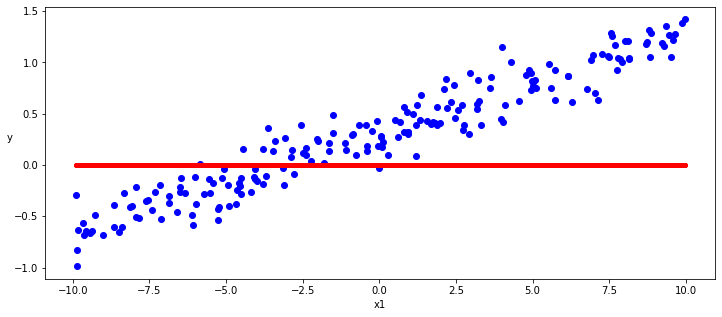

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()

print(type(x), x.shape, x.dtype)
print(type(y), y.shape, y.dtype)

plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.params = {
            "w" : tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1)),
            "b" : tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
        }        

    def __call__(self,x): 
        y_pred = x * self.params["w"] + self.params["b"]
        return y_pred

# PyTorch Model

In [8]:
class LinearRegressionPyTorch(torch.nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.w = torch.nn.Parameter(torch.Tensor(1, 1))
        self.b = torch.nn.Parameter(torch.Tensor(1))
        self.w.data.uniform_(-0.1, 0.1)
        self.b.data.uniform_(-0.1, 0.1)
  
    def forward(self, x):  
        return x @ self.w + self.b
    
    
# class LinearRegressionPyTorch(torch.nn.Module):
#     def __init__(self):
#         super(LinearRegressionPyTorch, self).__init__()
#         self.linear = torch.nn.Linear(1, 1)  

#     def forward(self, x):
#         out = self.linear(x)
#         return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf_model = LinearRegressionKeras()

for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
        
    dloss_dw,dloss_db = tape.gradient(loss, [tf_model.params["w"], tf_model.params["b"]])

    tf_model.params["w"].assign(tf_model.params["w"] - learning_rate*dloss_dw)
    tf_model.params["b"].assign(tf_model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.1540520340204239
Step 40, Loss 0.12033043801784515
Step 60, Loss 0.11115214228630066
Step 80, Loss 0.10431879013776779
Step 100, Loss 0.09813345223665237
Step 120, Loss 0.09243306517601013
Step 140, Loss 0.08717186003923416
Step 160, Loss 0.08231543749570847
Step 180, Loss 0.07783258706331253
Step 200, Loss 0.07369460165500641
Step 220, Loss 0.06987491250038147
Step 240, Loss 0.0663490742444992
Step 260, Loss 0.06309445202350616
Step 280, Loss 0.060090187937021255
Step 300, Loss 0.05731702968478203
Step 320, Loss 0.05475720763206482
Step 340, Loss 0.05239429324865341
Step 360, Loss 0.05021316558122635
Step 380, Loss 0.04819980263710022
Step 400, Loss 0.04634132981300354
Step 420, Loss 0.04462582245469093
Step 440, Loss 0.043042268604040146
Step 460, Loss 0.04158054292201996
Step 480, Loss 0.04023124650120735


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    diff = y_pred - y_true
    return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()
[w, b] = torch_model.parameters()

# criterion = torch.nn.MSELoss(reduction='mean')
# optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    epoch_loss = 0
    y_pred = torch_model(inputs)

    loss = squared_error(y_pred, labels)

    epoch_loss = loss.data

    # optimizer.zero_grad()
    loss.backward()
    # optimizer.step()

    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 20 == 0:
      print("Epoch {} : Loss {}".format(epoch, epoch_loss))


Epoch 0 : Loss 0.38226738572120667
Epoch 20 : Loss 0.09484376758337021
Epoch 40 : Loss 0.0699937641620636
Epoch 60 : Loss 0.06500997394323349
Epoch 80 : Loss 0.061750177294015884
Epoch 100 : Loss 0.05884126201272011
Epoch 120 : Loss 0.056163571774959564
Epoch 140 : Loss 0.05369244143366814
Epoch 160 : Loss 0.051411453634500504
Epoch 180 : Loss 0.04930591210722923
Epoch 200 : Loss 0.04736233130097389
Epoch 220 : Loss 0.045568276196718216
Epoch 240 : Loss 0.04391222074627876
Epoch 260 : Loss 0.04238357022404671
Epoch 280 : Loss 0.0409725159406662
Epoch 300 : Loss 0.03966999426484108
Epoch 320 : Loss 0.03846767544746399
Epoch 340 : Loss 0.03735784441232681
Epoch 360 : Loss 0.03633338585495949
Epoch 380 : Loss 0.035387735813856125
Epoch 400 : Loss 0.03451482579112053
Epoch 420 : Loss 0.0337090790271759
Epoch 440 : Loss 0.03296530619263649
Epoch 460 : Loss 0.032278746366500854
Epoch 480 : Loss 0.03164500743150711


# Data Visualization

In [13]:
tf_model.params["w"].numpy(), tf_model.params["b"].numpy(), w.tolist()[0][0], b.tolist()[0]

(array([0.09659055], dtype=float32),
 array([0.18958287], dtype=float32),
 0.09673585742712021,
 0.22805891931056976)

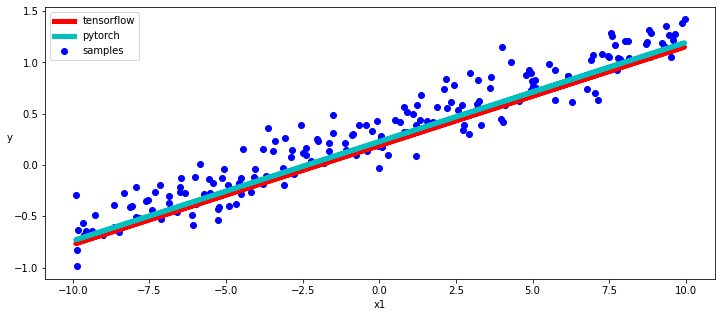

In [14]:
with torch.no_grad():
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x, y, c = "b", label="samples")
  ax.plot(x, tf_model.params["w"] * x + tf_model.params["b"], "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w * inputs + b, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)